In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder,LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/movies_data.csv", encoding='latin-1')
df.head()

,Movie,Director,Running time,Actor 1,Actor 2,Actor 3,Genre,Budget,Box Office,Actors Box Office %,Director Box Office %,Earnings,Oscar and Golden Globes nominations,Oscar and Golden Globes awards,Release year,IMDb score
0,13 Hours,Michael Bay,144,Toby Stephens,James Badge Dale,David Costabile,Action,50000000,69400000,50.00,69.23,19400000,0,0.0,2016,7.4
1,16 Blocks,Richard Donner,102,Bruce Willis,David Zayas,Sasha Roiz,Action,52000000,65000000,33.33,50.00,13000000,0,0.0,2006,6.6
2,17 Again,Burr Steers,102,Matthew Perry,Hunter Parrish,Thomas Lennon,Comedy,20000000,139000000,44.44,25.00,119000000,0,0.0,2009,6.4
3,1982,Tommy Oliver,90,Bokeem Woodbine,Ruby Dee,Quinton Aaron,Drama,1000000,2000000,50.00,100.00,1000000,0,0.0,2013,7.1
4,2 Fast 2 Furious,John Singleton,107,Paul Walker,Cole Hauser,Mo Gallini,Action,76000000,236000000,75.00,42.85,160000000,0,0.0,2003,5.9


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3974 entries, 0 to 3973
Data columns (total 16 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Movie                                3974 non-null   object 
 1   Director                             3974 non-null   object 
 2   Running time                         3974 non-null   int64  
 3   Actor 1                              3974 non-null   object 
 4   Actor 2                              3974 non-null   object 
 5   Actor 3                              3972 non-null   object 
 6   Genre                                3974 non-null   object 
 7   Budget                               3974 non-null   int64  
 8   Box Office                           3974 non-null   int64  
 9   Actors Box Office %                  3974 non-null   float64
 10  Director Box Office %                3974 non-null   float64
 11  Earnings                      

In [ ]:
df.describe()

,Running time,Budget,Box Office,Actors Box Office %,Director Box Office %,Earnings,Oscar and Golden Globes nominations,Oscar and Golden Globes awards,Release year,IMDb score
count,3974.000000,3.974000e+03,3.974000e+03,3.974000e+03,3974.000000,3.974000e+03,3974.000000,3971.000000,3974.000000,3974.000000
mean,109.967036,3.690639e+07,1.086770e+08,2.984678e+09,52.780695,7.177060e+07,1.106694,0.321330,2002.043785,6.467866
std,22.507658,4.270431e+07,1.798354e+08,1.344684e+11,35.360199,1.526573e+08,2.724019,1.209324,12.127027,1.072514
min,20.000000,1.100000e+03,5.000000e+04,0.000000e+00,0.000000,-3.231000e+08,0.000000,0.000000,1929.000000,1.600000
25%,95.000000,9.000000e+06,1.200000e+07,3.333000e+01,25.000000,0.000000e+00,0.000000,0.000000,1998.000000,5.900000
50%,106.000000,2.200000e+07,4.300000e+07,5.714000e+01,50.000000,1.850000e+07,0.000000,0.000000,2005.000000,6.600000
75%,120.000000,5.000000e+07,1.250000e+08,8.333000e+01,80.000000,8.100000e+07,1.000000,0.000000,2010.000000,7.200000
max,330.000000,3.900000e+08,2.923000e+09,6.805556e+12,100.000000,2.686000e+09,22.000000,13.000000,2016.000000,9.300000


In [ ]:
df.isnull()

,Movie,Director,Running time,Actor 1,Actor 2,Actor 3,Genre,Budget,Box Office,Actors Box Office %,Director Box Office %,Earnings,Oscar and Golden Globes nominations,Oscar and Golden Globes awards,Release year,IMDb score
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3969,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3970,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3971,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3972,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
df.isnull().sum()

,0
Movie,0
Director,0
Running time,0
Actor 1,0
Actor 2,0
Actor 3,2
Genre,0
Budget,0
Box Office,0
Actors Box Office %,0


In [ ]:
df.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
3969,False
3970,False
3971,False
3972,False


In [ ]:
df.duplicated().sum()

np.int64(24)

In [ ]:
# Drop duplicate rows
df.drop_duplicates(inplace=True)

In [ ]:
df.dtypes

,0
Movie,object
Director,object
Running time,int64
Actor 1,object
Actor 2,object
Actor 3,object
Genre,object
Budget,int64
Box Office,int64
Actors Box Office %,float64


In [ ]:
df.columns

Index(['Movie', 'Director', 'Running time', 'Actor 1', 'Actor 2', 'Actor 3',
       'Genre', 'Budget', 'Box Office', 'Actors Box Office %',
       'Director Box Office %', 'Earnings',
       'Oscar and Golden Globes nominations', 'Oscar and Golden Globes awards',
       'Release year', 'IMDb score'],
      dtype='object')

In [ ]:
print("The number of rows",df.shape[0])
print("The number of columns",df.shape[1])

The number of rows 3950
The number of columns 16


In [ ]:
# Drop duplicate rows
df.drop_duplicates(inplace=True)

In [ ]:
# Handling missing values
df.dropna(inplace=True)  # Drop missing values (or use df.fillna())

<Figure size 1200x600 with 0 Axes>

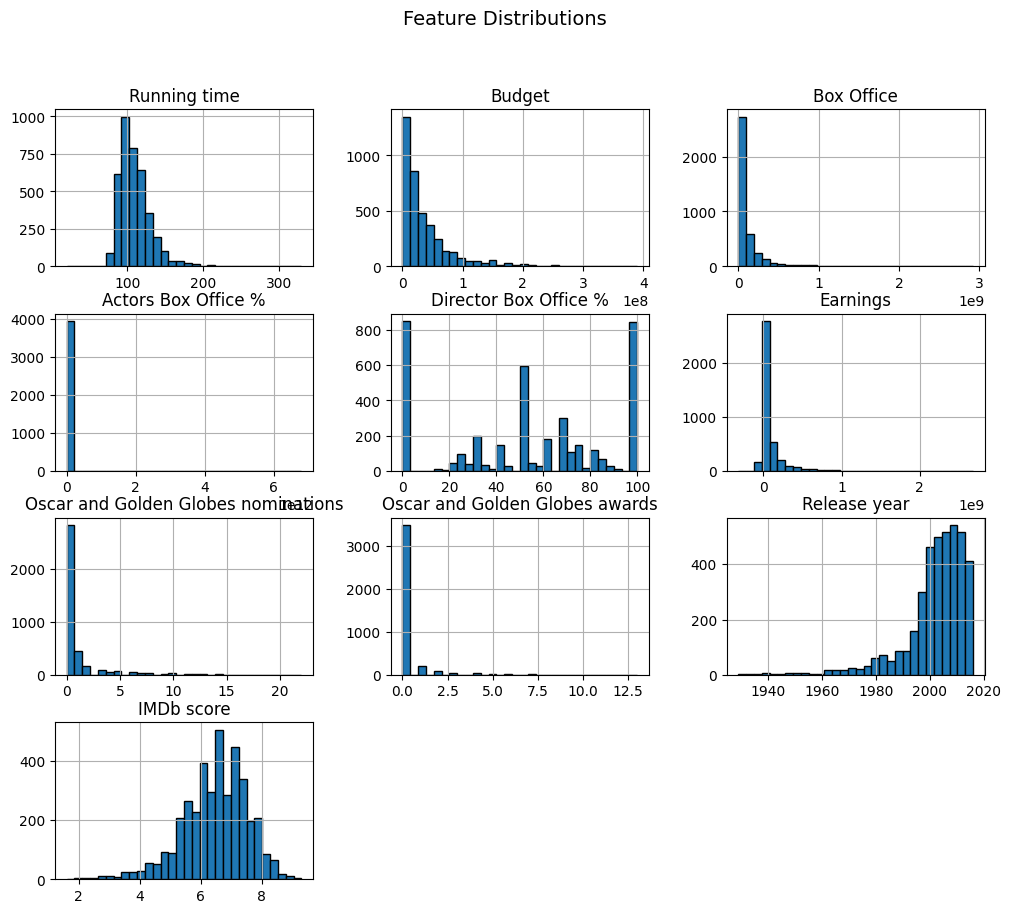

In [ ]:
# Distribution of numerical features
plt.figure(figsize=(12, 6))
df.hist(bins=30, figsize=(12, 10), edgecolor='black')
plt.suptitle("Feature Distributions", fontsize=14)
plt.show()

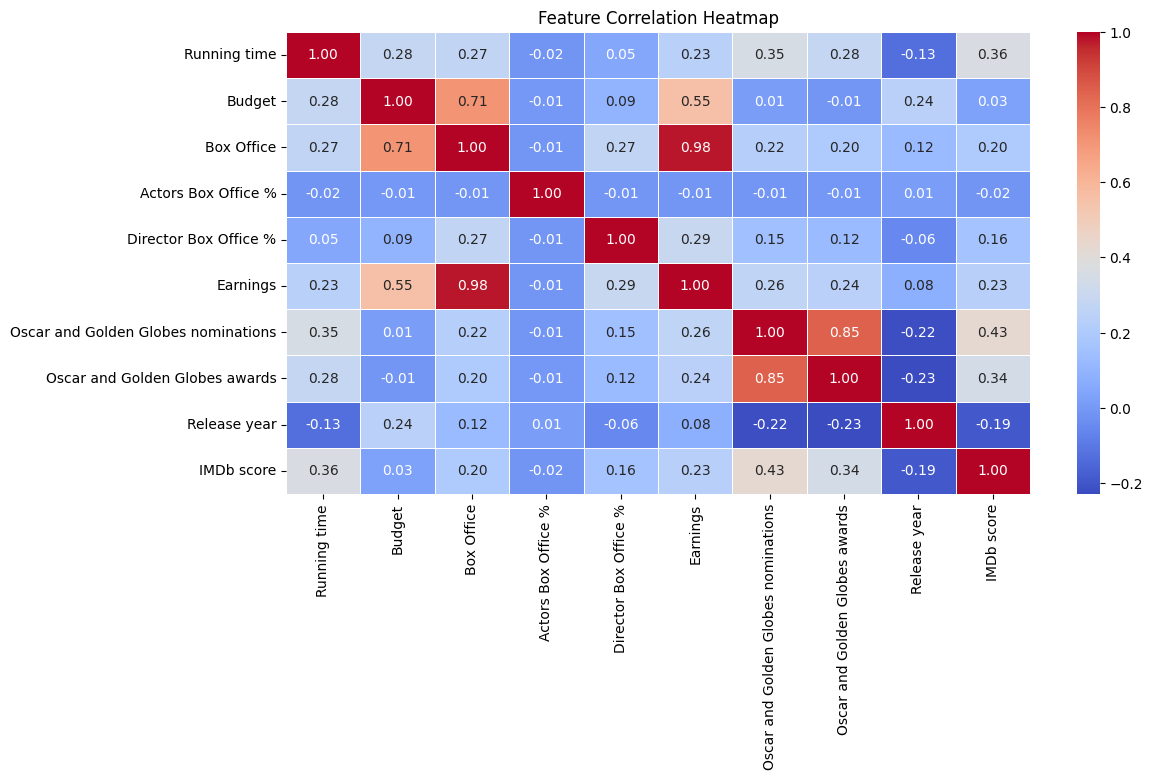

In [ ]:
# Correlation heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

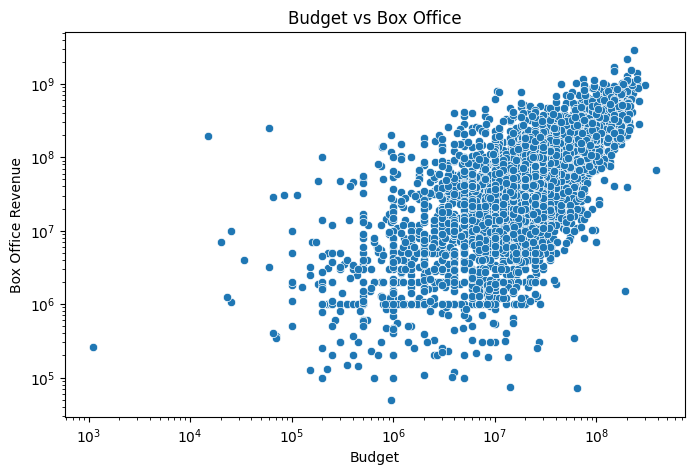

In [ ]:
# Budget vs Box Office
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df['Budget'], y=df['Box Office'])
plt.xscale("log")
plt.yscale("log")
plt.xlabel("Budget")
plt.ylabel("Box Office Revenue")
plt.title("Budget vs Box Office")
plt.show()

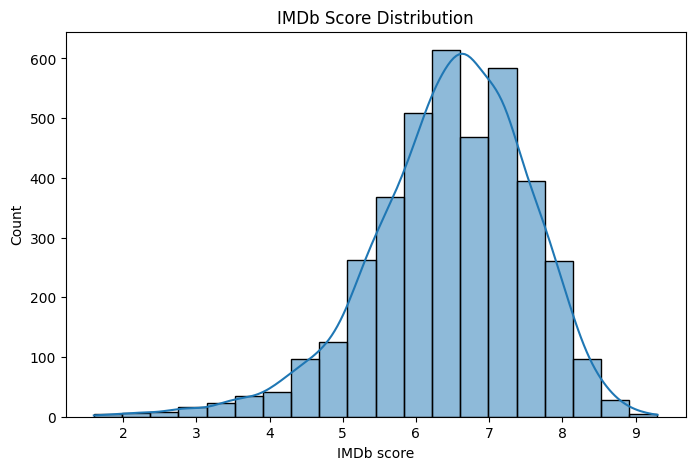

In [ ]:
# IMDb Score distribution
plt.figure(figsize=(8, 5))
sns.histplot(df['IMDb score'], bins=20, kde=True)
plt.title("IMDb Score Distribution")
plt.show()

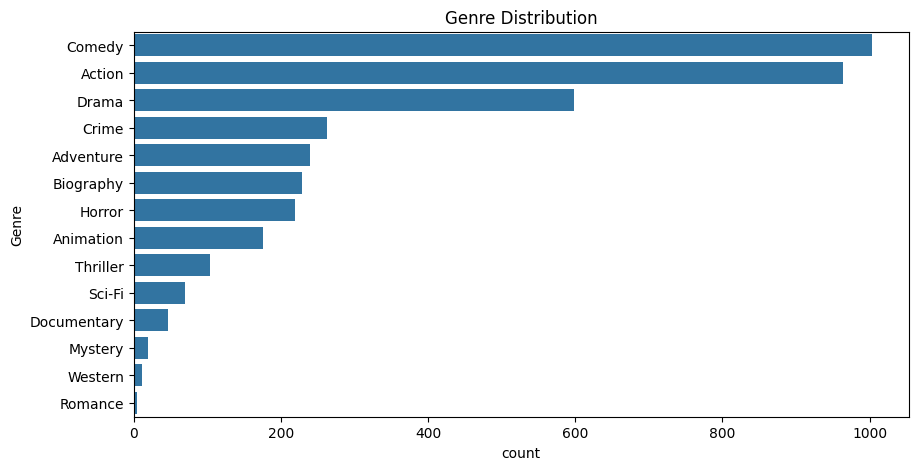

In [ ]:
# Genre distribution
plt.figure(figsize=(10, 5))
sns.countplot(y=df['Genre'], order=df['Genre'].value_counts().index)
plt.title("Genre Distribution")
plt.show()

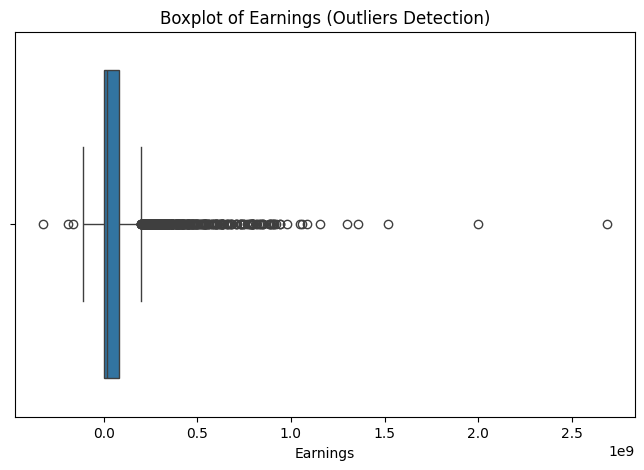

In [ ]:
# Detecting outliers in Earnings
plt.figure(figsize=(8, 5))
sns.boxplot(x=df['Earnings'])
plt.title("Boxplot of Earnings (Outliers Detection)")
plt.show()

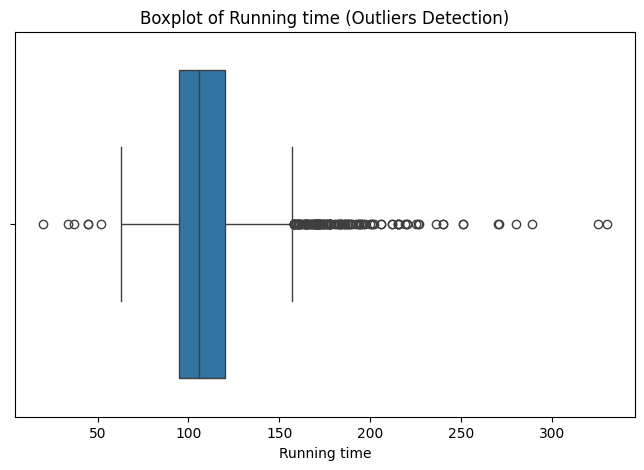

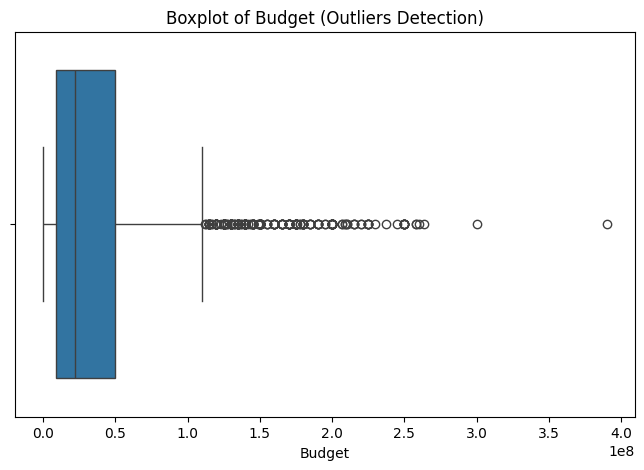

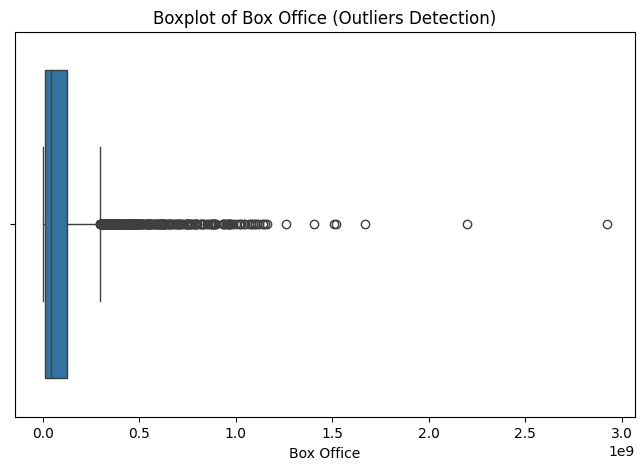

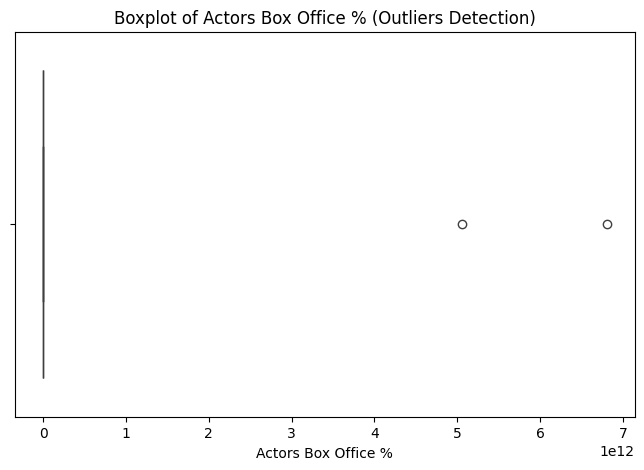

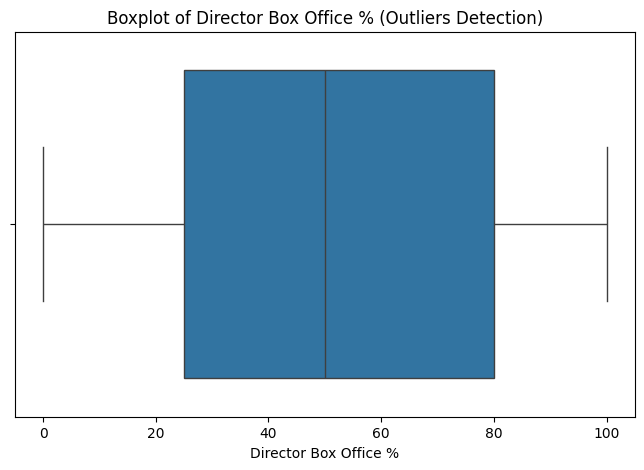

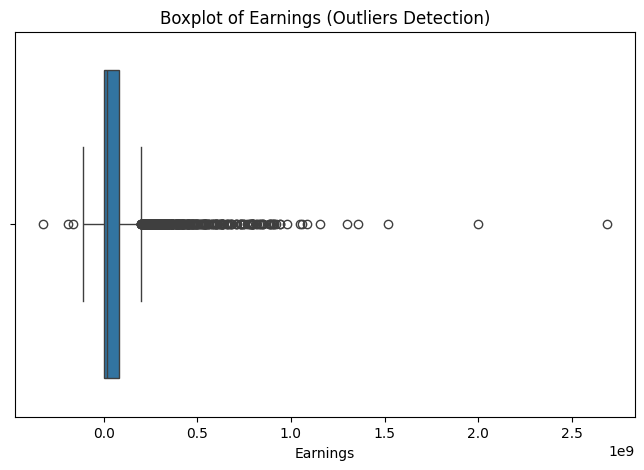

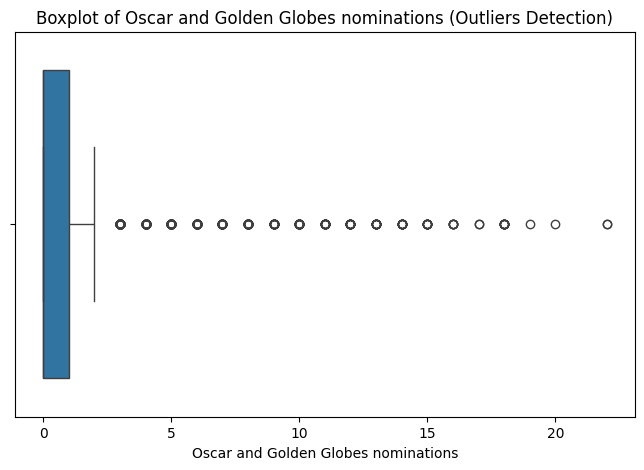

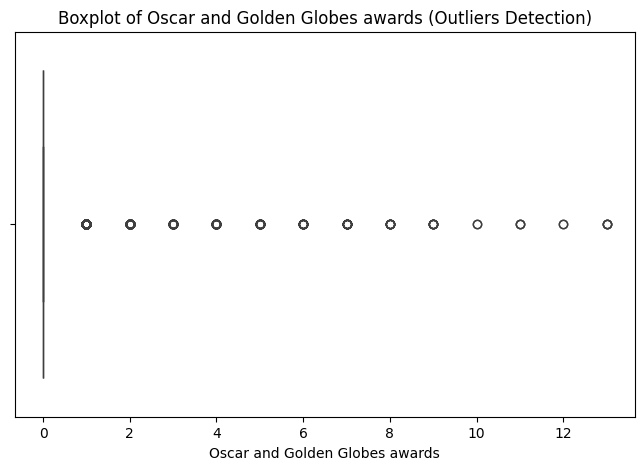

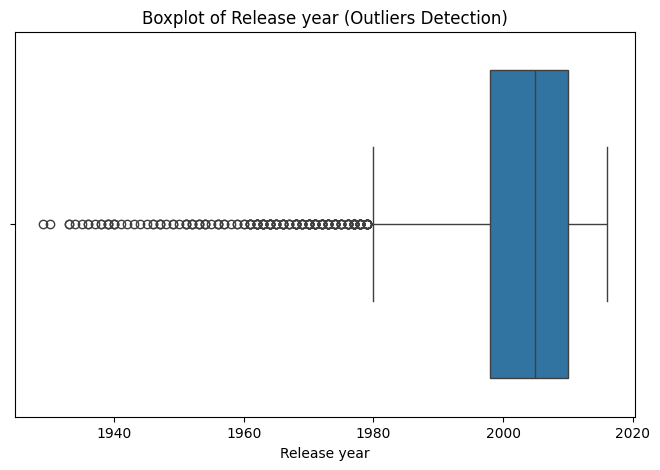

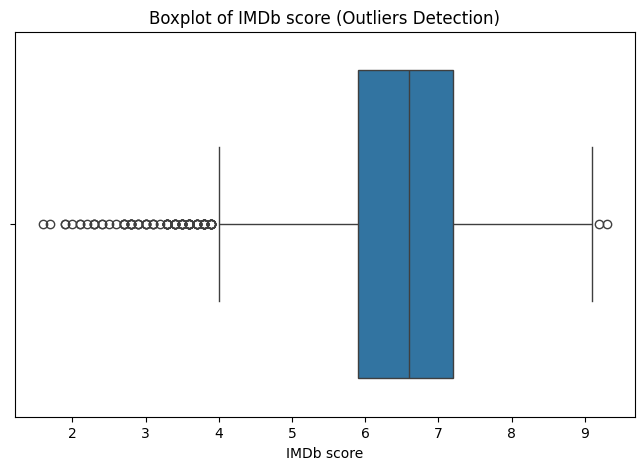

In [ ]:
# Detecting outliers in all numerical columns
numeric_cols = df.select_dtypes(include=['number']).columns
for col in numeric_cols:
    plt.figure(figsize=(8, 5))
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot of {col} (Outliers Detection)")
    plt.show()

In [ ]:
# Function to detect outliers using the IQR method
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers

# Function to detect outliers using Z-score
def detect_outliers_zscore(data, column, threshold=3):
    mean = data[column].mean()
    std = data[column].std()
    z_scores = (data[column] - mean) / std
    outliers = data[np.abs(z_scores) > threshold]
    return outliers

# Choose a numerical column for outlier detection
numerical_columns = df.select_dtypes(include=['number']).columns

# Detect and print outliers
for col in numerical_columns:
    print(f"\nOutliers in column '{col}' using IQR method:")
    print(detect_outliers_iqr(df, col))

    print(f"\nOutliers in column '{col}' using Z-score method:")
    print(detect_outliers_zscore(df, col))



Outliers in column 'Running time' using IQR method:
                                     Movie              Director  \
6                                     2012       Roland Emmerich   
49                               Alexander          Oliver Stone   
56                   All the Pretty Horses    Billy Bob Thornton   
114     Batman v Superman: Dawn of Justice           Zack Snyder   
209                            Cloud Atlas            Tom Tykwer   
...                                    ...                   ...   
3723                    The Sound of Music           Robert Wise   
3793                   There Will Be Blood  Paul Thomas Anderson   
3832                     Tora! Tora! Tora!     Richard Fleischer   
3895  Wal-Mart: The High Cost of Low Price      Robert Greenwald   
3954                             Woodstock      Michael Wadleigh   

      Running time          Actor 1            Actor 2           Actor 3  \
6              158     Oliver Platt         Liam James

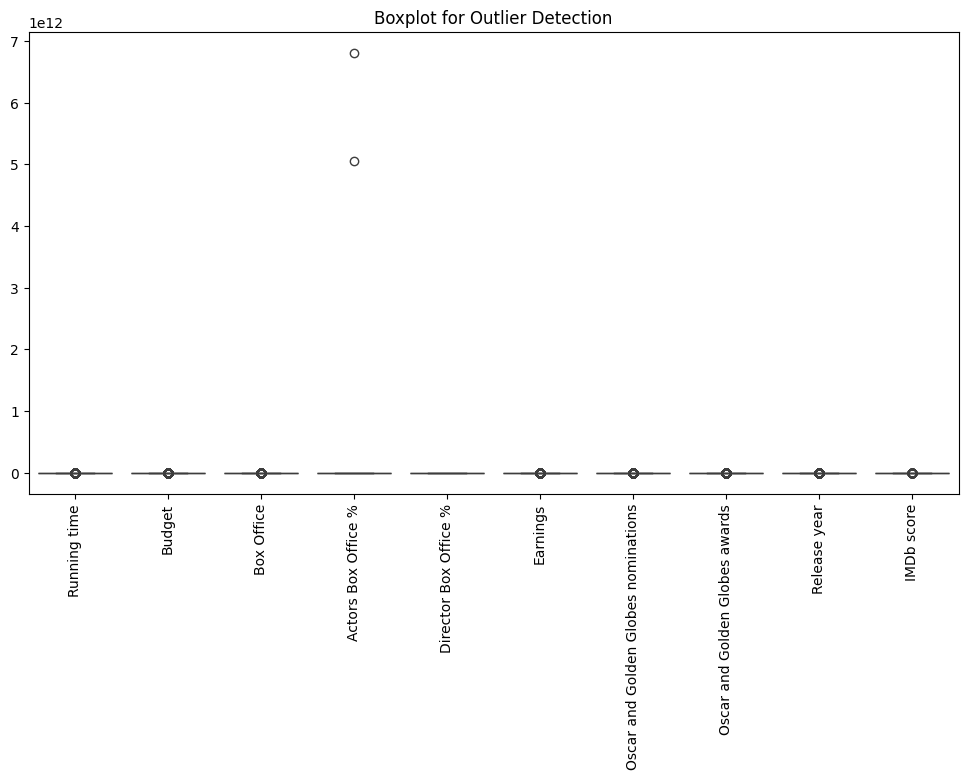

In [ ]:
# Visualization using boxplot
plt.figure(figsize=(12,6))
sns.boxplot(data=df[numerical_columns])
plt.xticks(rotation=90)
plt.title("Boxplot for Outlier Detection")
plt.show()

In [ ]:
# Selecting features (including actors and director)
features = [
    "Running time", "Genre", "Budget", "Box Office", "Actors Box Office %",
    "Director Box Office %", "Oscar and Golden Globes nominations",
    "Oscar and Golden Globes awards", "Release year", "IMDb score",
    "Actor 1", "Actor 2", "Actor 3", "Director"
]
target = "Earnings"

# Make an explicit copy to avoid SettingWithCopyWarning
X = df[features].copy()
y = df[target].copy()

# Handling categorical data (Encoding 'Genre', 'Actor 1', 'Actor 2', 'Actor 3', 'Director')
label_encoders = {}
categorical_columns = ["Genre", "Actor 1", "Actor 2", "Actor 3", "Director"]

for col in categorical_columns:
    label_encoders[col] = LabelEncoder()
    X.loc[:, col] = label_encoders[col].fit_transform(X[col].astype(str))  # Use .loc to avoid warning

# Handling missing values (Fill NaN with median for numerical data)
X.fillna(X.median(numeric_only=True), inplace=True)  # Use numeric_only=True to avoid future warnings

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Decision Tree Regressor
model = DecisionTreeRegressor(random_state=42)
model.fit(X_train, y_train)

# Making predictions
y_pred = model.predict(X_test)

# Evaluating the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"R² Score: {r2}")



Mean Absolute Error: 5850731.4752851715
Mean Squared Error: 322821946002745.94
R² Score: 0.984258720845538


In [ ]:
# Define a sample movie for prediction
sample_data_dict = {
    "Running time": [120],
    "Genre": ["Action"],
    "Budget": [50000000],
    "Box Office": [150000000],
    "Actors Box Office %": [60],
    "Director Box Office %": [50],
    "Oscar and Golden Globes nominations": [2],
    "Oscar and Golden Globes awards": [1],
    "Release year": [2023],
    "IMDb score": [7.5],
    "Actor 1": ["Leonardo DiCaprio"],
    "Actor 2": ["Brad Pitt"],
    "Actor 3": ["Margot Robbie"],
    "Director": ["Quentin Tarantino"]
}

# Convert sample data to a Pandas DataFrame
sample_df = pd.DataFrame(sample_data_dict)

# Encode categorical variables (handling unseen labels)
for col in categorical_columns:
    if sample_df[col][0] in label_encoders[col].classes_:
        sample_df[col] = label_encoders[col].transform(sample_df[col])
    else:
        sample_df[col] = -1  # Assign a default category for unseen labels

# Ensure numeric type conversion
sample_df = sample_df.astype(float)

# Predict Earnings
prediction = model.predict(sample_df)
print(f"Predicted Earnings: {prediction[0]}")


Predicted Earnings: 102000000.0


In [ ]:
import pickle

# Save the trained model
with open("model.pkl", "wb") as file:
    pickle.dump(model, file)

# Download the file from Colab to your computer
from google.colab import files
files.download("model.pkl")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>